In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
train_data = pd.read_csv(r"D:\Datasets\titanic\train.csv")
test_data = pd.read_csv(r"D:\Datasets\titanic\test.csv")

In [243]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [244]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [245]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [246]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [247]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [248]:
train_data.Embarked.isna().sum()

2

In [249]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

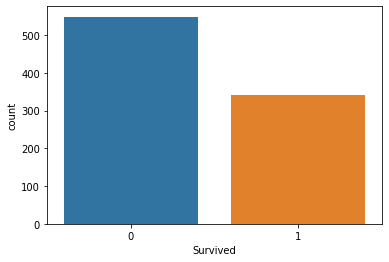

In [250]:
sns.countplot(x = train_data['Survived'])
plt.show()

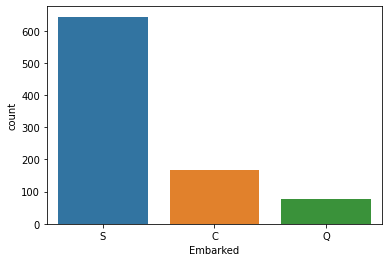

In [251]:
sns.countplot(x= train_data['Embarked'])
plt.show()

As S is more than C and Q so we fill none value with S

In [252]:
train_data.Embarked.fillna('S', inplace = True)
train_data.Embarked.isna().sum()

0

In [253]:
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [254]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [255]:
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']

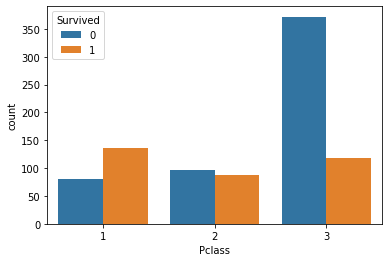

In [256]:
sns.countplot(data = train_data, x='Pclass', hue='Survived' )
plt.show()

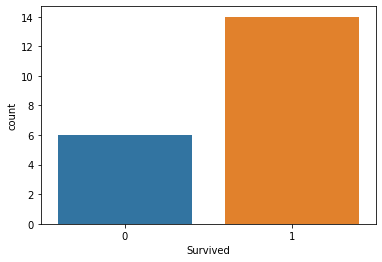

In [257]:
sns.countplot(x = train_data[train_data.Fare > 200]['Survived'])
plt.show()

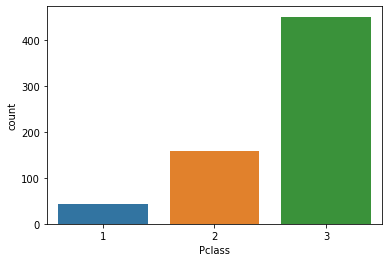

In [258]:
sns.countplot(x = train_data[train_data.Fare < 30]['Pclass'])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

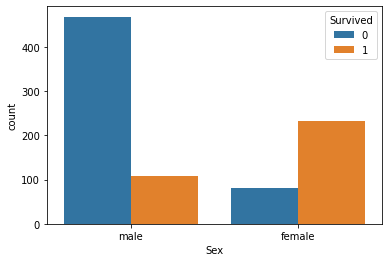

In [259]:
sns.countplot(data = train_data, x='Sex', hue='Survived')

In [260]:
# train_data = train_data[train_data.Fare != 0]

In [261]:
std = train_data.Fare.std()
mn = train_data.Fare.mean()

In [262]:
train_data[train_data.Pclass == 3].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,491.000000,491.0,355.000000,491.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,1.008147
std,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,1.953525
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,0.000000
75%,0.000000,3.0,32.000000,1.000000,0.000000,15.500000,1.000000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,10.000000


In [263]:
train_data[train_data.Pclass == 2].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,184.000000,184.0,173.000000,184.000000,184.000000,184.000000,184.000000
mean,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.782609
std,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,1.054017
min,0.000000,2.0,0.670000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,0.000000
50%,0.000000,2.0,29.000000,0.000000,0.000000,14.250000,0.000000
75%,1.000000,2.0,36.000000,1.000000,1.000000,26.000000,1.250000
max,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,5.000000


In [264]:
train_data['Fare per person'] = train_data['Fare'] / (train_data['Relatives'] + 1)
test_data['Fare per person'] = test_data['Fare'] / (test_data['Relatives'] + 1)

In [265]:
# train_data = train_data[train_data['Fare per person'] < 58]

In [266]:
train_data.shape

(891, 11)

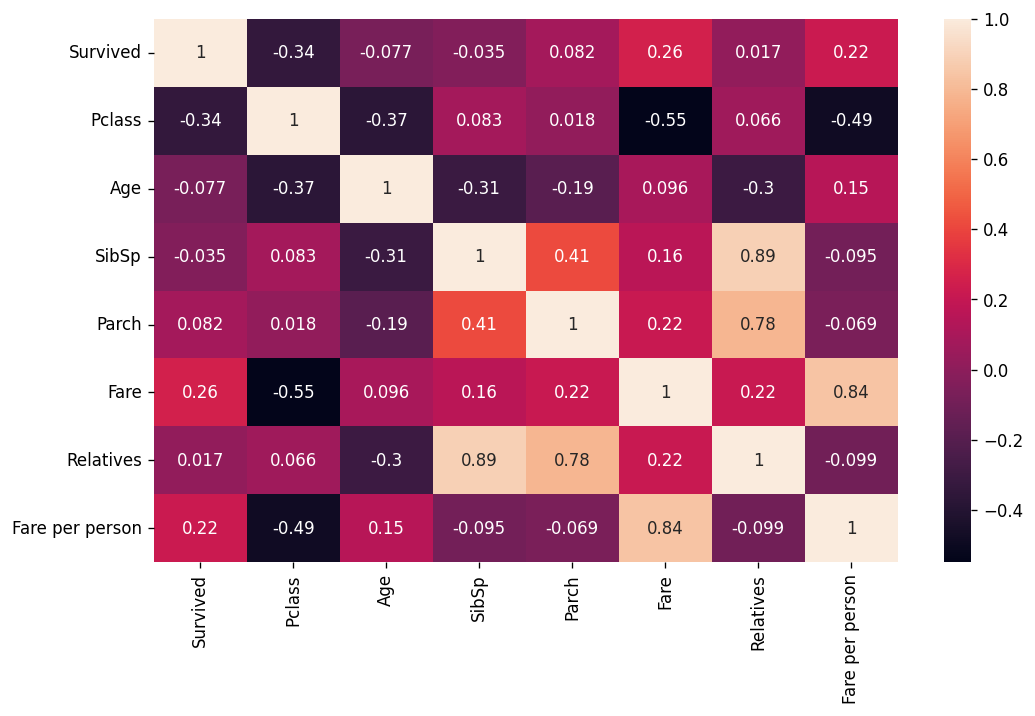

In [267]:
plt.figure(figsize=(10,6),dpi=120)
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [268]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [269]:
train_data.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Cabin              687
Embarked             0
Relatives            0
Fare per person      0
dtype: int64

In [270]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [271]:
type(train_data['Age'][0])

numpy.float64

In [272]:
imputer = SimpleImputer(strategy='median')
num_col  = ['Age', 'Fare', 'Fare per person']
train_data[num_col] = imputer.fit_transform(train_data[['Age', 'Fare', 'Fare per person']])

In [273]:
test_data[num_col] = imputer.transform(test_data[num_col])

In [274]:
train_data.isna().sum().sum()

0

In [275]:
test_data.isna().sum().sum()

0

In [276]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Fare per person
0,0,3,male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,female,38.0,1,0,71.2833,C,1,35.64165


In [277]:
ohe = OneHotEncoder(sparse=False)
cat_col = ['Sex','Embarked']
ohe.fit_transform(train_data[cat_col])

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [278]:
ohe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [279]:
train_data.isna().sum().sum()

0

In [280]:
train_data.shape

(891, 10)

In [281]:
train_data[cat_col]

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [282]:
train_data = pd.concat([train_data,pd.DataFrame(ohe.fit_transform(train_data[cat_col]),columns=['Female','Male','C','Q','S'])],axis=1)
test_data = pd.concat([test_data,pd.DataFrame(ohe.transform(test_data[cat_col]),columns=['Female','Male','C','Q','S'])],axis=1)

In [283]:
train_data.shape

(891, 15)

In [284]:
train_data.isna().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Relatives          0
Fare per person    0
Female             0
Male               0
C                  0
Q                  0
S                  0
dtype: int64

In [285]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [286]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data.Survived

In [287]:
X_train.isna().sum()

Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Relatives          0
Fare per person    0
Female             0
Male               0
C                  0
Q                  0
S                  0
dtype: int64

In [288]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [289]:
lr_model = LogisticRegression()
dct_model = DecisionTreeClassifier()
rf_model =RandomForestClassifier()
grbt_model = GradientBoostingClassifier()
adbc_model = AdaBoostClassifier()

In [290]:
models = [lr_model,dct_model,rf_model,grbt_model,adbc_model]
names = ['LogisticRegression','DecisionTree','Random Forest','Adaboost','G boosting']

In [291]:
for name,model in zip(names,models):
    print(f'{name} score --> {cross_val_score(model,X_train,y_train,cv=4)}')
    print('------------------------------------------------------------------------')

LogisticRegression score --> [0.78026906 0.80269058 0.76233184 0.80630631]
------------------------------------------------------------------------
DecisionTree score --> [0.69506726 0.78475336 0.78026906 0.76576577]
------------------------------------------------------------------------


C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Random Forest score --> [0.76233184 0.83856502 0.81165919 0.78828829]
------------------------------------------------------------------------
Adaboost score --> [0.78923767 0.84304933 0.83408072 0.83333333]
------------------------------------------------------------------------
G boosting score --> [0.77130045 0.81165919 0.77130045 0.82882883]
------------------------------------------------------------------------


In [222]:
# X.shape

In [292]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

Almost every model performance is same on the data so we will try grid search

In [293]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [294]:
adbc_model.fit(X_train,y_train)

AdaBoostClassifier()

In [295]:
for name,score in zip(list(test_data.columns),rf_model.feature_importances_):
    print(f'{name} ---> {score}')

PassengerId ---> 0.059614581792228345
Pclass ---> 0.22793126437914377
Age ---> 0.026014114406155007
SibSp ---> 0.02103158320307033
Parch ---> 0.14714601407338596
Fare ---> 0.04522436412142882
Relatives ---> 0.15996464602727492
Fare per person ---> 0.1111968976064182
Female ---> 0.16985814532305013
Male ---> 0.011645644132079174
C ---> 0.007678318017079334
Q ---> 0.01269442691868611


In [296]:
y_pred_rf = rf_model.predict(test_data.drop('PassengerId', axis=1))

In [297]:
y_pred_lr = (lr_model.predict(test_data.drop('PassengerId', axis=1))).astype(int)

In [298]:
y_pred_adbc = adbc_model.predict(test_data.drop('PassengerId', axis=1))

In [299]:
test_data_rf = pd.concat([test_data,pd.Series(y_pred_rf)],axis=1)
test_data_rf = test_data_rf.rename(columns={0:'Survived'})

In [301]:
test_data_rf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Relatives,Fare per person,Female,Male,C,Q,S,Survived
0,892,3,34.5,0,0,7.8292,0,7.829200,0.0,1.0,0.0,1.0,0.0,0
1,893,3,47.0,1,0,7.0000,1,3.500000,1.0,0.0,0.0,0.0,1.0,0
2,894,2,62.0,0,0,9.6875,0,9.687500,0.0,1.0,0.0,1.0,0.0,0
3,895,3,27.0,0,0,8.6625,0,8.662500,0.0,1.0,0.0,0.0,1.0,1
4,896,3,22.0,1,1,12.2875,2,4.095833,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,8.050000,0.0,1.0,0.0,0.0,1.0,0
414,1306,1,39.0,0,0,108.9000,0,108.900000,1.0,0.0,1.0,0.0,0.0,1
415,1307,3,38.5,0,0,7.2500,0,7.250000,0.0,1.0,0.0,0.0,1.0,0
416,1308,3,28.0,0,0,8.0500,0,8.050000,0.0,1.0,0.0,0.0,1.0,0
